# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.001742e+01     9.009888e+00
 * time: 0.04734611511230469
     1     2.832386e+01     5.441628e+00
 * time: 0.053739070892333984
     2     1.942878e+01     4.422121e+00
 * time: 0.061254024505615234
     3     1.326336e+01     3.239204e+00
 * time: 0.06830310821533203
     4     1.213679e+01     3.739339e+00
 * time: 0.0739450454711914
     5     1.161664e+01     2.730020e+00
 * time: 0.07982301712036133
     6     1.002840e+01     1.954320e+00
 * time: 0.08578109741210938
     7     8.842224e+00     1.181103e+00
 * time: 0.09189009666442871
     8     8.444123e+00     8.065023e-01
 * time: 0.09804511070251465
     9     8.310470e+00     8.270138e-01
 * time: 0.10439014434814453
    10     8.210149e+00     7.162361e-01
 * time: 0.10878896713256836
    11     8.192495e+00     8.622421e-01
 * time: 0.11329317092895508
    12     8.159534e+00     7.080015e-01
 * time: 0.11808514595031738
    13     8.145177e+00     6.772407e-01
 * time

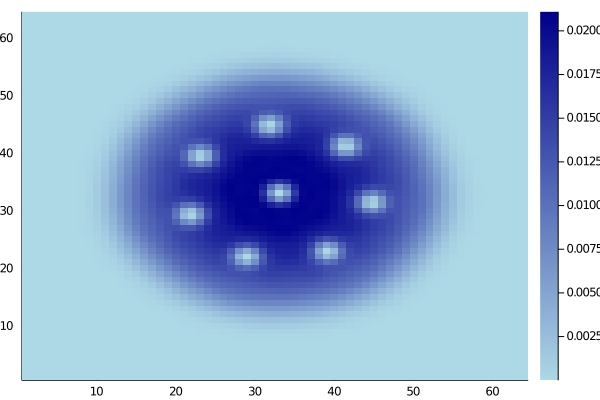

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)